## INTRODUCTION

A data science project on analyzing customer personality with python. Here I will be using a dataset that contains data collected from a marketing campaign, where our task is to predict how different customer segments will respond for a particular product or service.

!pip install mlxtend

In [95]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [96]:
data=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv',header=0,sep=';')
data.head()

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.000        0         0   
1  2174        1954  Graduation         Single 46344.000        1         1   
2  4141        1965  Graduation       Together 71613.000        0         0   
3  6182        1984  Graduation       Together 26646.000        1         0   
4  5324        1981         PhD        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

  0%|                                                                                         | 0/1523 [00:00<…


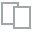
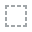
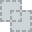
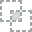
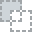
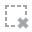
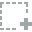
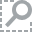
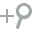
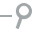
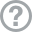
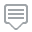
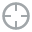
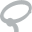
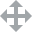
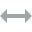
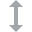
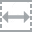
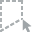
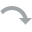
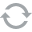
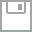
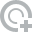
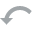
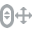
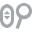
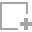
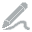
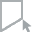
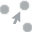
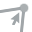
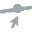

In [97]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(data)

Now I will create some new features in the dataset to define the customer personalities as a part of data preparation

In [98]:
##3. Create a new feature that calculates the age of customers based on the "Year_Birth" column.
Current_year=datetime.datetime.now().year
data['Age']=Current_year - data['Year_Birth']
data.head()

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.000        0         0   
1  2174        1954  Graduation         Single 46344.000        1         1   
2  4141        1965  Graduation       Together 71613.000        0         0   
3  6182        1984  Graduation       Together 26646.000        1         0   
4  5324        1981         PhD        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  
0              3         11         1   66  
1              3         11         0   69  
2              3         11         0   58  
3              3         11         0   39  
4              3         11         0   42

In [99]:
data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
5          520         42               98                0                42   
6          235         65              164               50                49   
7           76         10               56                3                 1   
8           14          0               24                3                 3   
9           28          0                6                1                 1   
10           5          5                6                0                 2   
11           6         16               11               11                 1   
12         194         61              480              225               112   
13         233          2               53                3                 5   
14           3         14               17                6                 1   
15        1006         22              115               59                68   
16          53          5               19                2                13   
17          84          5               38              150                12   
18        1012         80              498                0                16   
19           4         17               19               30                24   
20          86          2               73               69                38   
21           1          1             1725                1                 1   
22         867          0               86                0                 0   
23         384          0              102               21                32   
24         270          3               27               39                 6   
25           6          4               25               15                12   
26         173          4               30                3                 6   
27           5          1                3                3               263   
28          36          2               42               20                21   
29         684        100              801               21                66   
30           8          4               10                2                 2   
31         112         17               44               34                22   
32         110          0                5                2                 0   
33          96         12               96               33                22   
34         482         34              471              119                68   
35          40          0               19                2                 1   
36         702         17              151                0                 8   
37           6          3               14               15                 7   
38          55          0                6                2                 0   
39         437          8              206              160                49   
40         421         76              536               82               178   
41          13          1               29                3                 0   
42           9          0                6                3                 1   
43          81         11               50                3                 2   
44           3          1               10                3                 2   
45         123        164              266              227                30   
46           3         18               14               15                22   
47          13          6               15                3                 5   
48          48          5            

In [100]:
data['Spending']=data.iloc[:,9:15].sum(axis=1)

In [101]:
current_date = pd.to_datetime(datetime.datetime.now())  
# Calculate the difference in months between 'Dt_Customer' and the current date
cust_join=pd.to_datetime(data['Dt_Customer'])
data['Seniority'] =(current_date.year-cust_join.dt.year)*12+(current_date.month-cust_join.dt.month)


In [102]:
data.rename(columns={'NumWebPurchases':'Web','NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'},inplace=True)

In [103]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [104]:
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [105]:
data.head()

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation          Alone 58138.000        0         0   
1  2174        1954  Graduation          Alone 46344.000        1         1   
2  4141        1965  Graduation      In couple 71613.000        0         0   
3  6182        1984  Graduation      In couple 26646.000        1         0   
4  5324        1981         PhD      In couple 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  Web  Catalog  Store  \
0                88            88                  3    8       10      4   
1                 1             6                  2    1        1      2   
2                21            42                  1    8        2     10   
3                 3             5                  2    2        0      4   
4                27            15                  5    5        3      6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Spending  \
0             0         0              3         11         1   66      1617   
1             0         0              3         11         0   69        27   
2             0         0              3         11         0   58       776   
3             0         0              3         11         0   39        53   
4             0         0              3         11         0   42       422   

   Seniority  
0        133  
1        115  
2        122  
3        116  
4        117

In [106]:
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


data=data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head()

Age     Education Marital_Status    Income  Spending  Seniority  Has_child  \
0   66  Postgraduate          Alone 58138.000      1617        133   No child   
1   69  Postgraduate          Alone 46344.000        27        115  Has child   
2   58  Postgraduate      In couple 71613.000       776        122   No child   
3   39  Postgraduate      In couple 26646.000        53        116  Has child   
4   42  Postgraduate      In couple 58293.000       422        117  Has child   

     Children  Wines  Fruits  Meat  Fish  Sweets  Gold  
0    No child    635      88   546   172      88    88  
1  2 children     11       1     6     2       1     6  
2    No child    426      49   127   111      21    42  
3     1 child     11       4    20    10       3     5  
4     1 child    173      43   118    46      27    15

In [107]:
data.shape

(2240, 14)

Now I will remove the outliers and the missing values in the dataset:

In [108]:
data.isnull().sum()

Age                0
Education          0
Marital_Status     0
Income            24
Spending           0
Seniority          0
Has_child          0
Children           0
Wines              0
Fruits             0
Meat               0
Fish               0
Sweets             0
Gold               0
dtype: int64

In [109]:
data[data['Income']>600000]

Age     Education Marital_Status     Income  Spending  Seniority  \
2233   46  Postgraduate      In couple 666666.000        62        124   

      Has_child Children  Wines  Fruits  Meat  Fish  Sweets  Gold  
2233  Has child  1 child      9      14    18     8       1    12

In [110]:
data=data.dropna(subset=['Income'])
data=data[data['Income']<600000]

## Clustering
To take a look at the clustering of clients in the dataset, I’ll define the segments of the clients. Here we will use 4 equally weighted customer segments:

Stars: Old customers with high income and high spending nature.

Neet Attention: New customers with below-average income and low spending nature.

High Potential: New customers with high income and high spending nature.

Leaky Bucket: Old customers with below-average income and a low spending nature.

In [111]:
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')


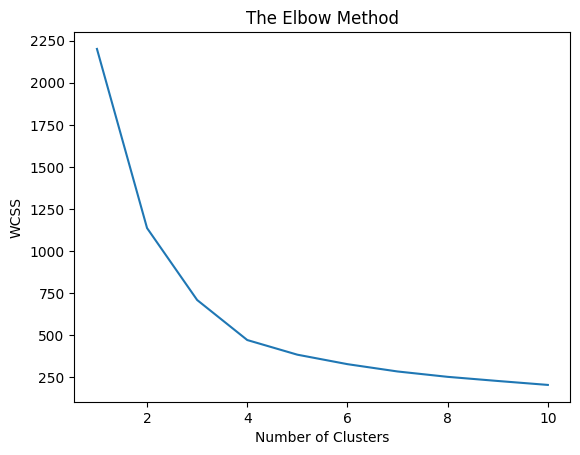

In [112]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
range_n_clusters=[2,3,4,5]

For n_clusters = 2 The average silhouette_score is : 0.4598215702434198
For n_clusters = 3 The average silhouette_score is : 0.46495511229093334
For n_clusters = 4 The average silhouette_score is : 0.4679021191816359
For n_clusters = 5 The average silhouette_score is : 0.4246366855253274


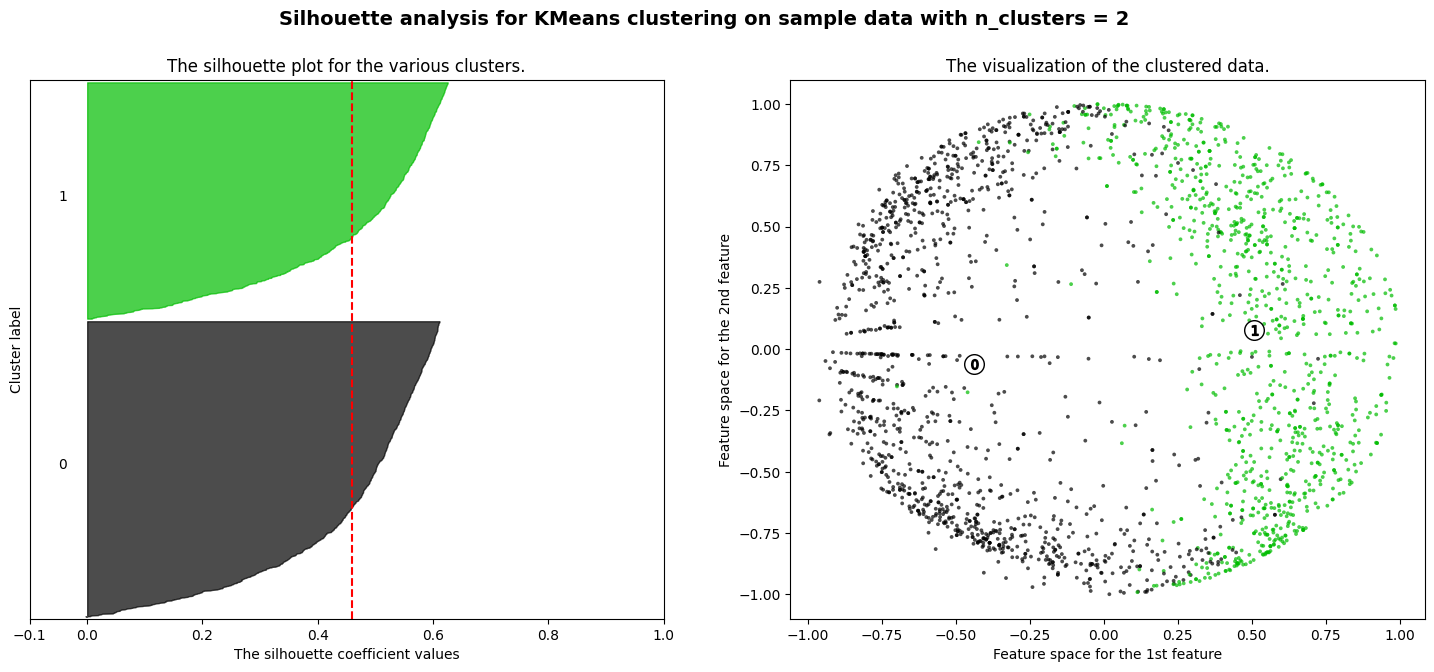

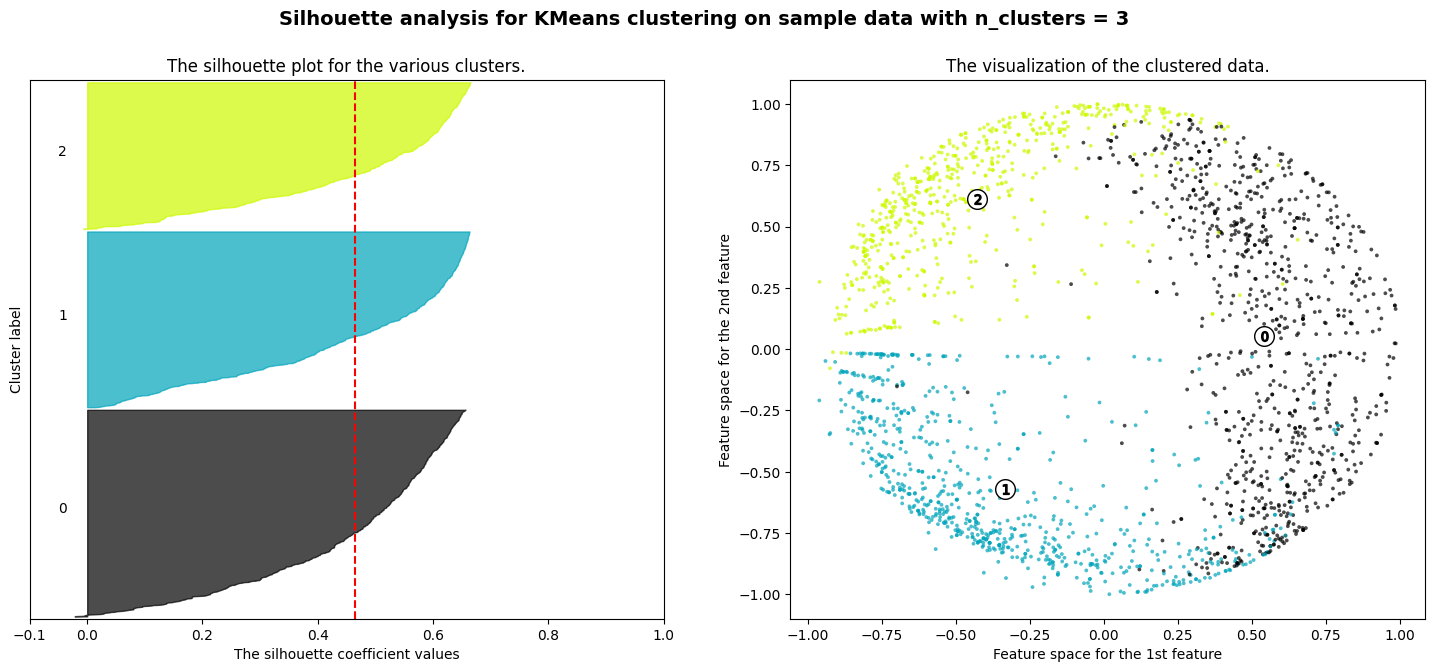

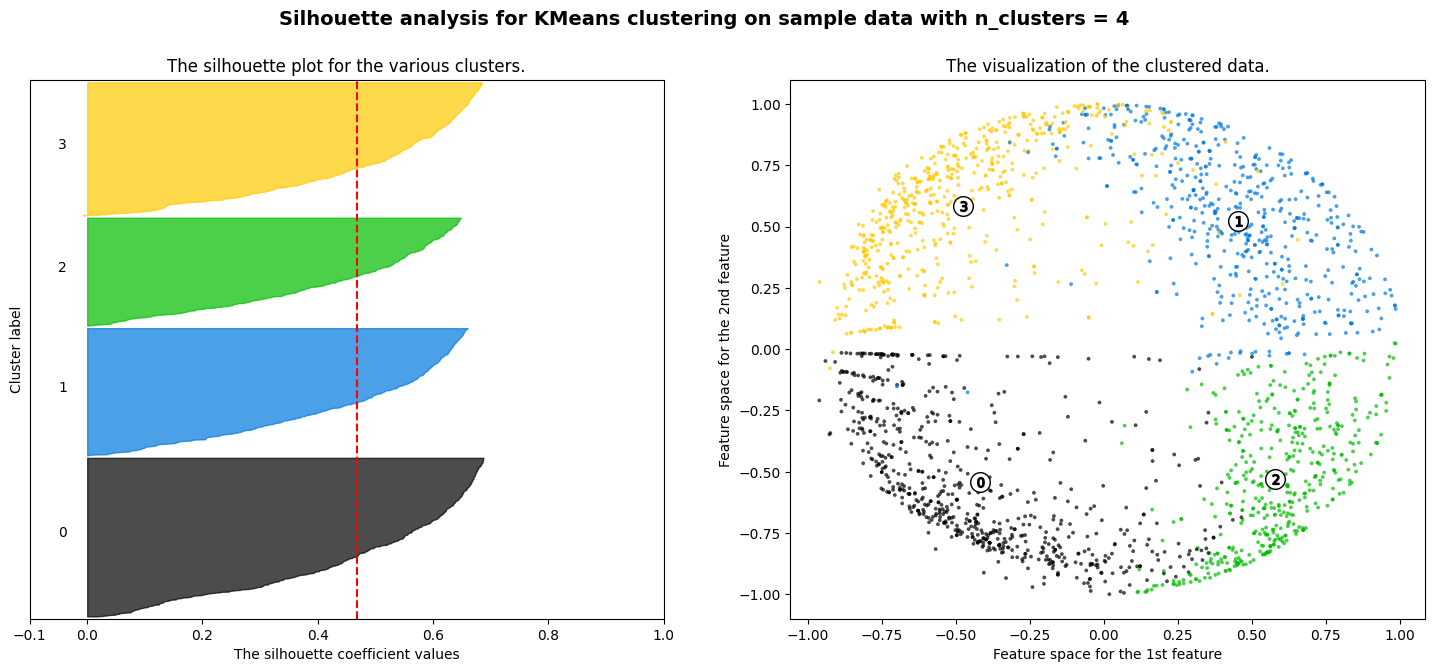

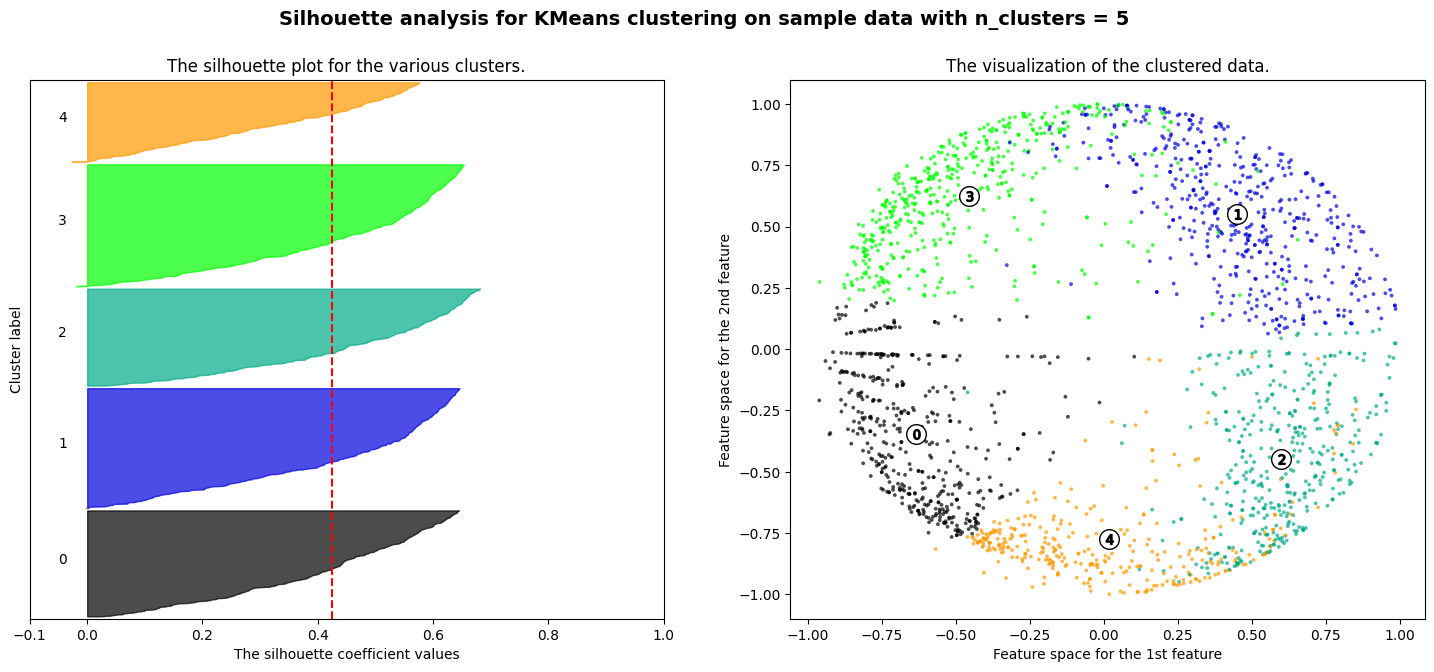

In [114]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4590592004417439
For n_clusters = 3 The average silhouette_score is : 0.4447378933359416
For n_clusters = 4 The average silhouette_score is : 0.46765899980279557
For n_clusters = 5 The average silhouette_score is : 0.4066643410363147


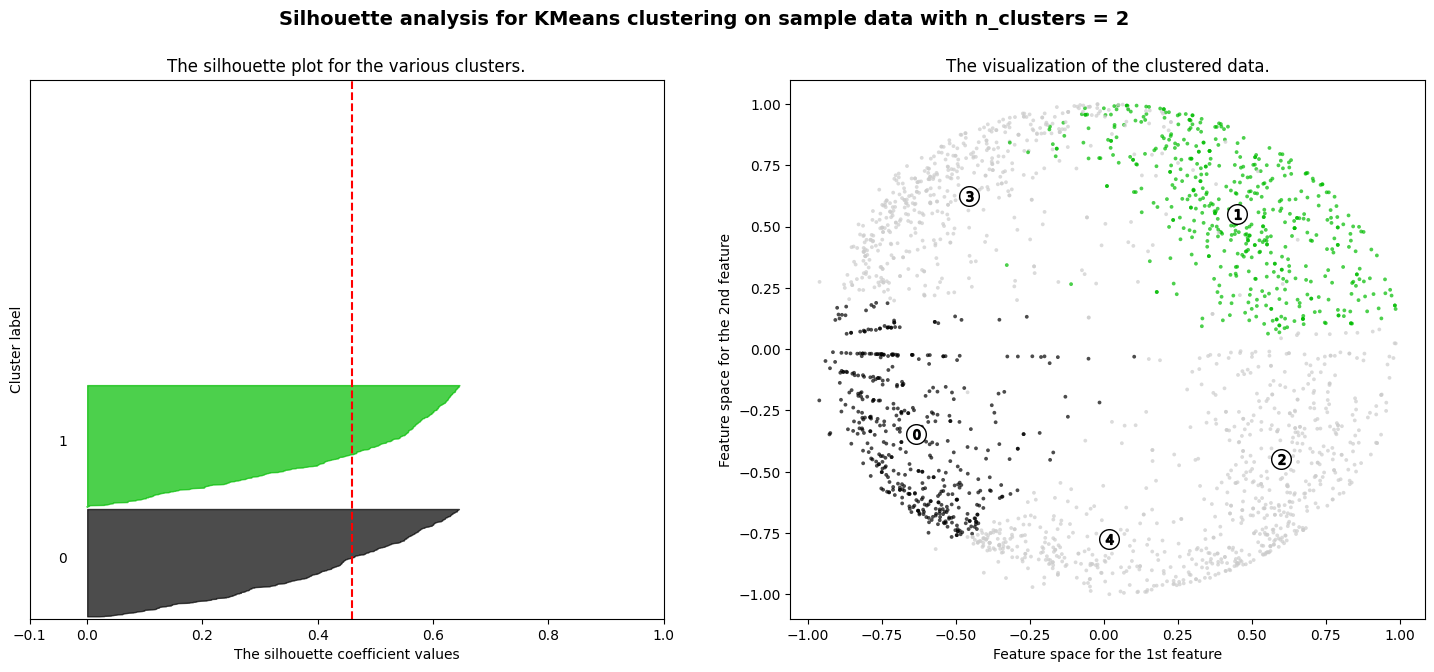

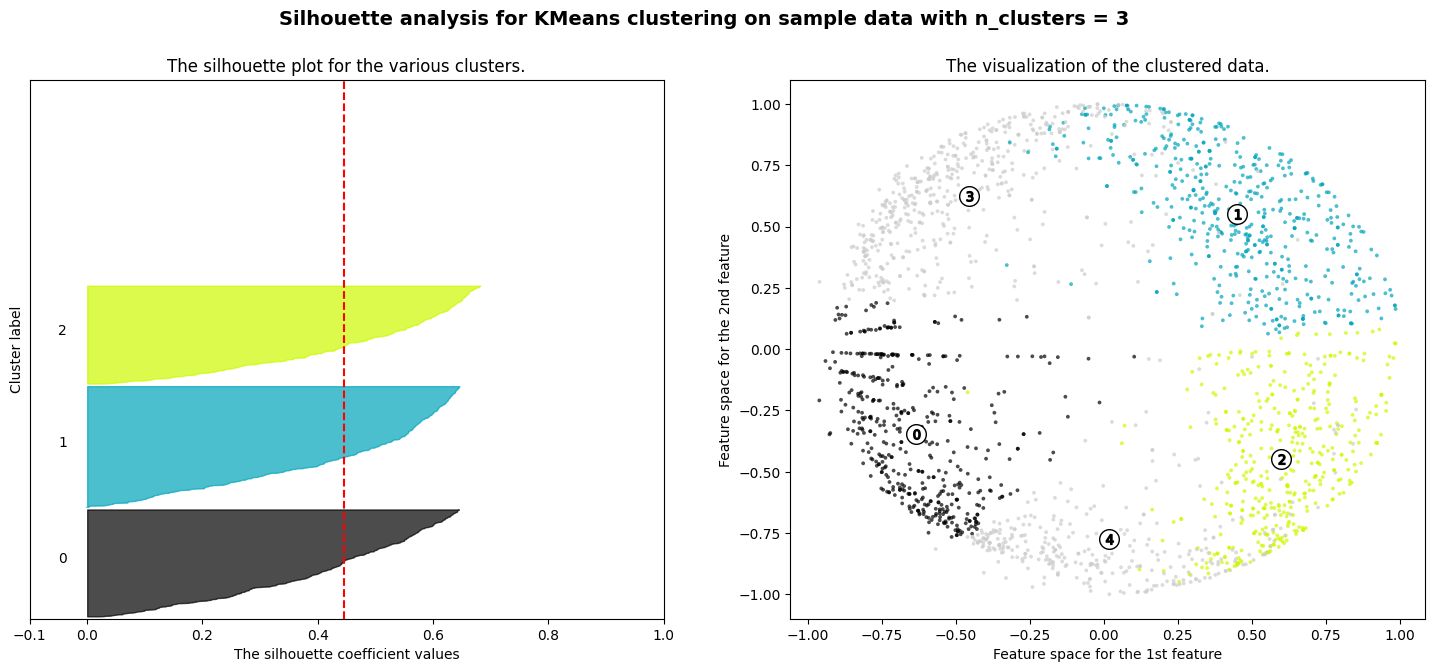

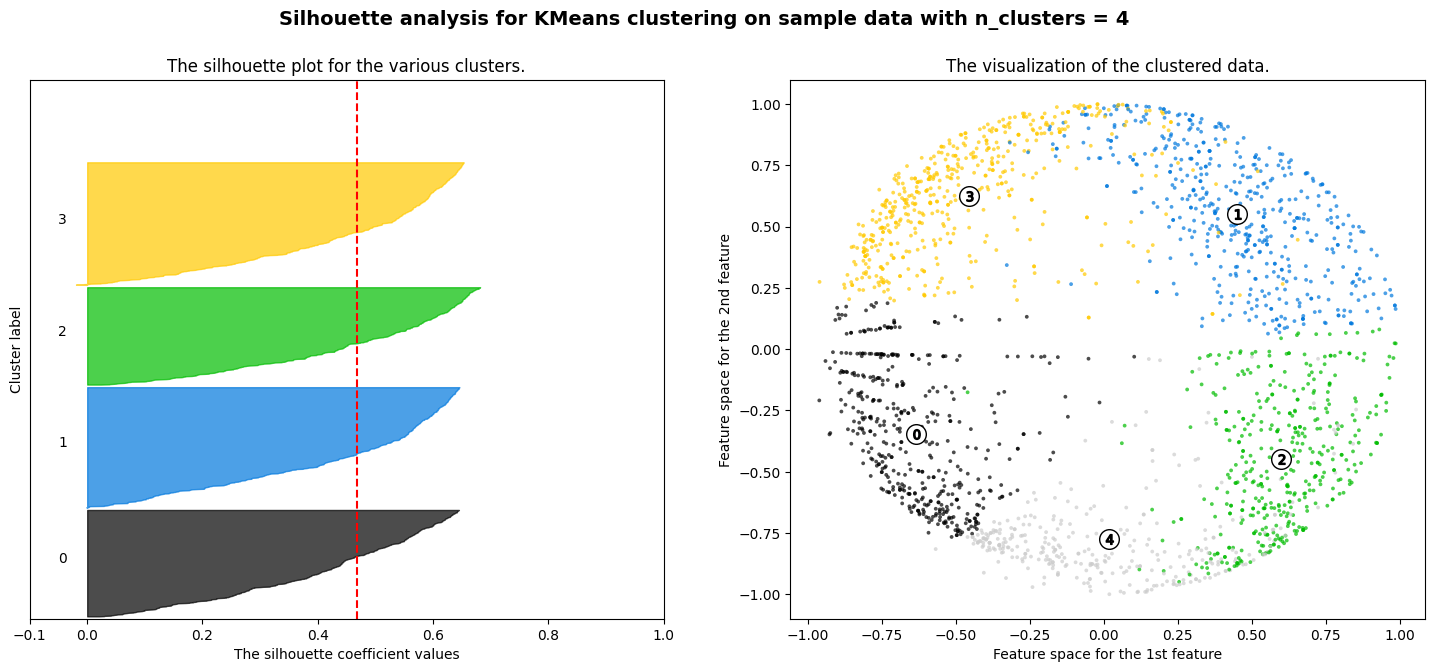

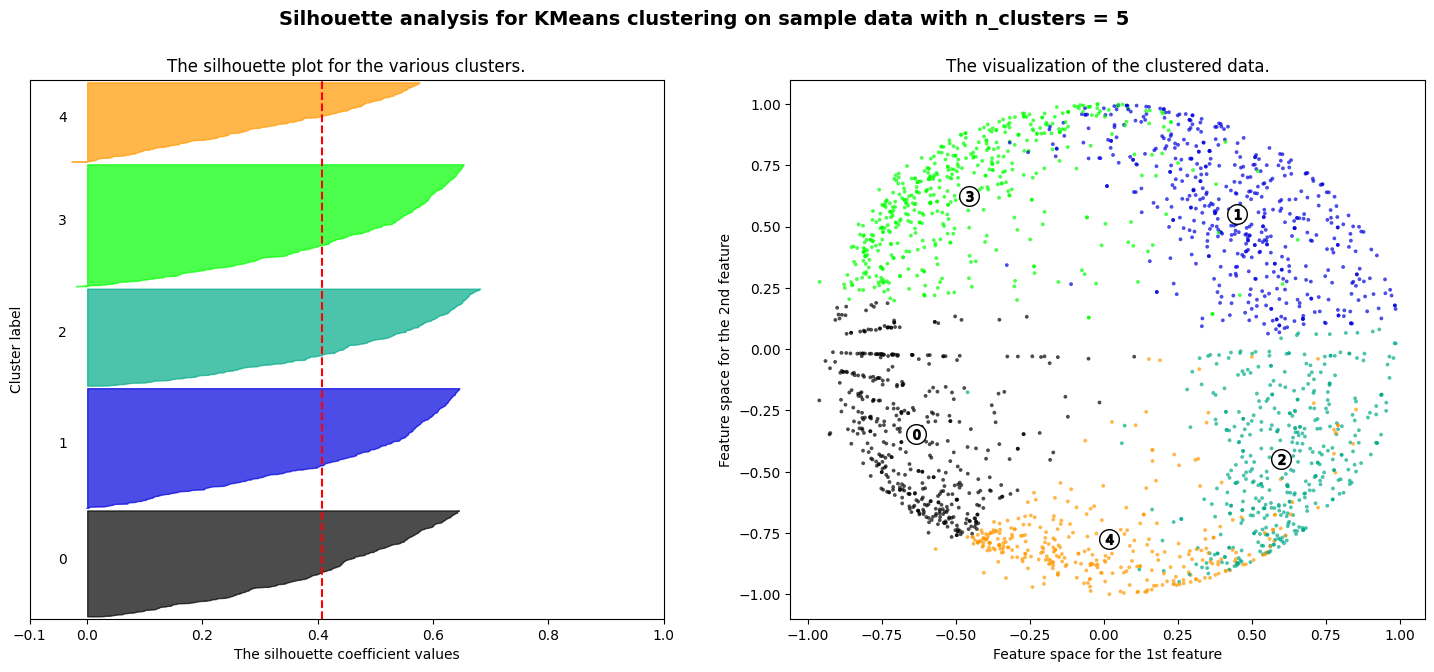

In [115]:
#dataset_temp=data[['Income','Seniority','Spending']]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm=GaussianMixture(n_components=n_clusters, covariance_type='spherical',max_iter=2000, random_state=5)
    gmm.fit(X)
    labels=gmm.predict(X)
    dataset_temp['Cluster'] = labels
    dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [116]:
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)
pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster          4  High potential  Leaky bucket  Need attention  Stars
Income count   456             250           536             523    450
       mean  73804           27807         35998           69492  41929
       std   13673            9162         12287           12023  11337
       min   49090            1730          2447           44802   4023
       25%   65487           22023         27232           60776  34560

!pip install plotly

In [117]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data.Cluster == C]['Income'],
                                y = data[data.Cluster == C]['Seniority'],
                                z = data[data.Cluster == C]['Spending'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Seniority', titlefont_color = 'black'),
                                zaxis=dict(title = 'Spending', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

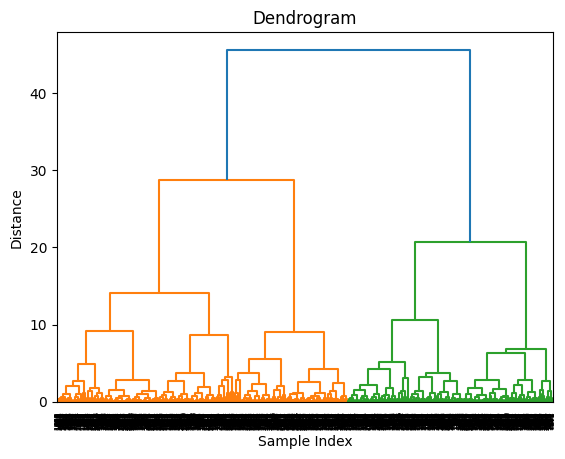

In [118]:
# Calculate the linkage matrix using Ward linkage and Euclidean distance
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Create a dendrogram
dendrogram(linkage_matrix, orientation='top', labels=range(len(X)), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

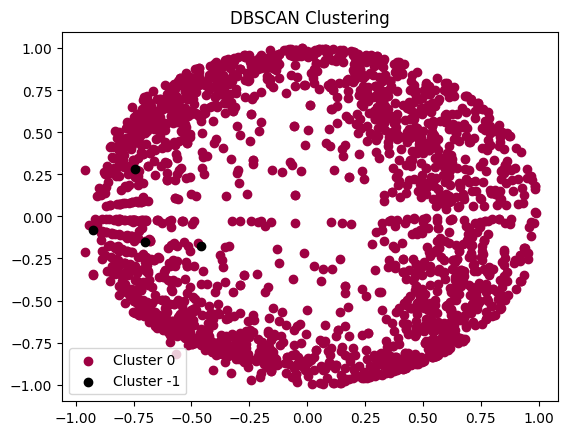

In [119]:
from sklearn.cluster import DBSCAN
# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust the parameters as needed
dbscan.fit(X)

# Get cluster labels (-1 indicates noise)
labels = dbscan.labels_

# Plot the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Black for noise points
    
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

I will prepare the data for the Apriori algorithm. Here I will be defining three segments of the customers according to the age, income and seniority:

In [120]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Seniority'], q=4, labels=cut_labels_Seniority)
data=data.drop(columns=['Age','Income','Seniority'])

In [121]:
data.head()

Education Marital_Status  Spending  Has_child    Children  Wines  \
0  Postgraduate          Alone      1617   No child    No child    635   
1  Postgraduate          Alone        27  Has child  2 children     11   
2  Postgraduate      In couple       776   No child    No child    426   
3  Postgraduate      In couple        53  Has child     1 child     11   
4  Postgraduate      In couple       422  Has child     1 child    173   

   Fruits  Meat  Fish  Sweets  Gold         Cluster Age_group  \
0      88   546   172      88    88  Need attention    Senior   
1       1     6     2       1     6           Stars    Senior   
2      49   127   111      21    42               4    Mature   
3       4    20    10       3     5           Stars     Adult   
4      43   118    46      27    15           Stars     Adult   

            Income_group        Seniority_group  
0  Medium to high income          Old customers  
1   Low to medium income          New customers  
2            High income  Discovering customers  
3             Low income          New customers  
4  Medium to high income          New customers

In [122]:

cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Non consumer",inplace=True)
data.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
data = data.astype(object)

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
8892          (Cluster_Need attention, Age_group_Mature, Education_Postgraduate)   
4520                          (Cluster_Need attention, Income_group_High income)   
4515                                  (Cluster_Need attention, Age_group_Mature)   
1421                            (Cluster_Need attention, Education_Postgraduate)   
5705  (Education_Postgraduate, Cluster_Need attention, Marital_Status_In couple)   

                           consequents  antecedent support  \
8892  (Wines_segment_Biggest consumer)               0.118   
4520  (Wines_segment_Biggest consumer)               0.119   
4515  (Wines_segment_Biggest consumer)               0.126   
1421  (Wines_segment_Biggest consumer)               0.216   
5705  (Wines_segment_Biggest consumer)               0.138   

      consequent support  support  confidence  lift  leverage  conviction  \
8892               0.249    0.082       0.697 2.803     0.053       2.482   
4520               0.249    0.082       0.692 2.782     0.053       2.439   
4515               0.249    0.087       0.689 2.771     0.056       2.418   
1421               0.249    0.140       0.645 2.593     0.086       2.117   
5705               0.249    0.089       0.644 2.588     0.055       2.109   

      zhangs_metric  
8892          0.729  
4520          0.727  
4515          0.732  
1421          0.784  
5705          0.712

So according to the output and overall analysis conducted on this data science project on customer personality analysis with Python, we can conclude that the biggest customers of wines are:

Customers with an average income of around $69,500.

Customers with an average total spend of approximately $1,252.

Customers registered with the company for approximately 21 months.

Customers with a graduate degree.

And customers who are also heavy consumers of meat products